In [1]:
%pip install -r requirements.txt
%load_ext autoreload
%autoreload 2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm #colormaps
import scipy.linalg as lg

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.special import binom
import itertools
import pandas as pd
import kaleido
from matplotlib.ticker import PercentFormatter # percentage for histograms
from matplotlib.ticker import MaxNLocator # integer x axis in plot.

from tools.perform_directsearch import directsearch
from tools.problems import *
from tools.utils_cm_hypersphere import *


plt.rcParams.update({
    'font.family': 'serif',  # Utilisation de la police serif
    'font.serif': ['cm'],      # Utilisation de la police Computer Modern
    'text.usetex': True,     # Utilisation de LaTeX pour le rendu du texte
    # 'font.size' : 10,
    # "axes.labelsize": 10,
    # "legend.fontsize": 8,
    # "xtick.labelsize": 8,
    # "ytick.labelsize": 8,
    'figure.figsize' : (6.4, 4.0),
    # "pgf.texsystem": "pdflatex",
})

# Fixing the seed
np.random.seed(1)
 

# Heatmap of cosine measure of the projected PSS of type 1 for the sphere of dimension 2

In [3]:

# Sanity check on the cosine measure algorithm ##################################################################
n = 7

a,b,c = generate_PSS(n, psstype=1), generate_PSS(n, psstype=2),generate_PSS(n, psstype=3)

print("1:",1/np.sqrt(n),compute_cm_HJB(a))    
print("2:", 1/np.sqrt(n**2+2*(n-1)*np.sqrt(n)), compute_cm_HJB(b))
print("3:", 1/n, compute_cm_HJB(c))

1: 0.3779644730092272 0.3779644730092272
2: 0.11128365503900636 0.1112836550390064
3: 0.14285714285714285 0.14285714285714282


In [4]:
# Computation of the heatmap on the sphere 
V_theta, V_phi, CM, X, pss, CM_intr = CM_heatmap_spheredim2(psstype = 1,n_samples = 10000, return_intrinsic_cm = True, tol_HJB=1e-14)

# for displaying of labels of PSS
pss_spread = 1.15*pss 
pss_labels = ["e1","e2","e3","-e1","-e2","-e3"]


zmin = min(CM.min(), CM_intr.min())
zmax = max(CM.max(), CM_intr.max())

In [5]:
# Plotting the heatmap with plotly ##################################################################
surface = go.Surface(x= X[:,:,0], y=X[:,:,1], z = X[:,:,2],
                     name = "cm",
                     colorscale = "Viridis",
                     colorbar=dict(
                        title="cm",
                        titleside="top",
                        titlefont=dict(size=25, family="serif"),
                        tickfont=dict(size=20, family="serif"),
                        x=0.9,      # horizontal position of colorbar (0:left, 1:right)
                        y=0.5,       # vertical center position (0:bottom, 1:top)
                        len=0.8,     # length of the colorbar (fraction of plot height)
                        thickness=20, # width in pixels
                        outlinecolor="black",  # optional border color
                    ),
                    surfacecolor= CM,opacity = 1)


pss_scatter = go.Scatter3d(x= pss[0], y=pss[1], z = pss[2], mode = "markers+text",
    marker=dict(
        size=5,
        color='red'),
        showlegend=False
)

pss_labels_scatter = go.Scatter3d(
    x=pss_spread[0],
    y=pss_spread[1],
    z=pss_spread[2],
    mode='text',
    text=pss_labels,
    textfont=dict(color="firebrick", size=25), 
    textposition="middle center",
    showlegend=False
)



fig = go.Figure()
fig.add_trace(pss_labels_scatter)
fig.add_trace(pss_scatter)
fig.add_trace(surface)




# Mettre un titre
fig.update_layout(
    title="titre",
    showlegend=True,
    #template="plotly_light",  # Apply a dark theme for all subplots
    title_x=0.5,  # center the title
    height=600,   # height of the figure
    width=650     # width of the figure
)


fig.update_layout(
    scene=dict(
        xaxis=dict(
            visible=False,    # hides everything related to the x-axis
            showbackground=False,
            showgrid=False,
            zeroline=False,
            showticklabels = True,
            ticks = "outside",
            title = "x"
        ),
        yaxis=dict(
            visible=False,
            showbackground=False,
            showgrid=False,
            zeroline=False,
        ),
        zaxis=dict(
            visible=False,
            showbackground=False,
            showgrid=False,
            zeroline=True,
        ),
        bgcolor="rgba(0,0,0,0)"  # transparent scene background
    ),
    paper_bgcolor="rgba(0,0,0,0)",  # transparent overall background
    plot_bgcolor="rgba(0,0,0,0)",
)


fig.update_layout(
    scene=dict(
        xaxis=dict(title="x"),
        yaxis=dict(title="y"),
        zaxis=dict(title="z"),
    ),
    margin=dict(l=0, r=0, t=0, b=0),  # small margins
)




camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=0.72, y=0.72, z=0.72)
)

fig.update_layout(scene_camera=camera)
fig.show()

fig.write_image("tables_and_plots/cosinemeasure_sphere/"+"cm_pssproj1_heatmap.pdf", scale=1, width=800, height=700, engine="kaleido")


camera = dict(
    up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=0),
    eye=dict(x=1.247, y=0, z=0)
)
fig.update_layout(scene_camera=camera)
fig.show()
fig.write_image("tables_and_plots/cosinemeasure_sphere/"+"cm_pssproj1_heatmap_view2.pdf", scale=1, width=800, height=700, engine="kaleido")

################ Entering dimension n =  3


  0%|          | 0/103 [00:00<?, ?it/s]

################ Entering dimension n =  4


  0%|          | 0/103 [00:00<?, ?it/s]

################ Entering dimension n =  5


  0%|          | 0/103 [00:00<?, ?it/s]

################ Entering dimension n =  6


  0%|          | 0/103 [00:00<?, ?it/s]

################ Entering dimension n =  7


  0%|          | 0/103 [00:00<?, ?it/s]

################ Entering dimension n =  8


  0%|          | 0/103 [00:00<?, ?it/s]

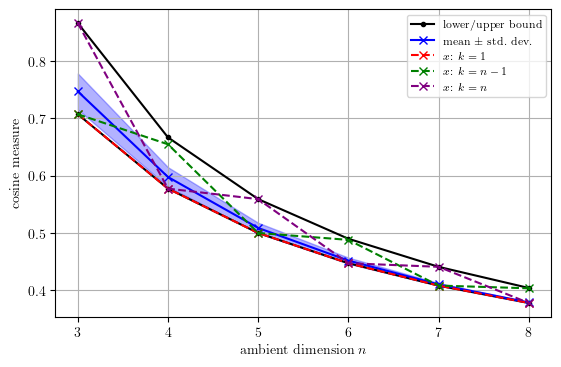

In [6]:
# Plot of the projected cosine measure of PSS 1 at various points, for various ambient dimensions ##################################################################
mindim, maxdim = 3,8
adims = np.arange(mindim,maxdim+1)
n_samples = 100
for psstype in [1]: #,2,3
    CMS_mean,CMS_sd, CMS_min, CMS_max, CMS_part_points, CMS_intr, part_points_labels,part_points_colors = compute_cm_with_dims(adims,psstype =psstype,n_samples=n_samples)


    plt.figure()
    default_width, default_height = plt.rcParams["figure.figsize"]
    titlefonts = 1789
    subtitle_fonts = 10
    label_fonts = 8

    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # display only integers on xaxis

    if psstype == 1:
        plt.plot(adims, upper_bound_projcm(adims,psstype = 1,attempt_tight=False), linestyle = "-",marker = ".",color = "k",label = "lower/upper bound")
        plt.plot(adims, lower_bound_projcm(adims,psstype = 1), linestyle = "-",marker = ".",color = "k")

    plt.plot(adims,CMS_mean,color = "blue", marker = "x", linestyle = "-", label = "mean $\\pm$ std. dev.")

    plt.fill_between(adims, CMS_mean-CMS_sd, CMS_mean+CMS_sd, color='blue', alpha=0.3)
    for k,_ in enumerate(CMS_part_points):
        plt.plot(adims, CMS_part_points[k],marker = "x", linestyle = "--",label = part_points_labels[k], color = part_points_colors[k])

    plt.xlabel("ambient dimension $n$",fontsize = subtitle_fonts)
    plt.ylabel("cosine measure", fontsize = subtitle_fonts)
    plt.grid(True)

    plt.legend(fontsize = label_fonts)
    plt.savefig("tables_and_plots/cosinemeasure_sphere/"+"plotprojected_cm_psstype="+str(psstype)+"dimrange"+str(mindim)+"-"+str(maxdim)+".pdf",bbox_inches='tight', dpi=300)
